In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
g = 4
lr = 1.0e-4
wd = 0.1
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 0.0001 focal loss, gamma: 4 wd: 0.1, Lora alpha 8, rank 8


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0992	Val Loss:	0.7056	Accuracy:	0.3961	F1:	0.3921
2 / 30: Train Loss:	0.0904	Val Loss:	0.6829	Accuracy:	0.5996	F1:	0.5811
3 / 30: Train Loss:	0.0865	Val Loss:	0.6714	Accuracy:	0.6324	F1:	0.6119
4 / 30: Train Loss:	0.0802	Val Loss:	0.6454	Accuracy:	0.6893	F1:	0.6545
5 / 30: Train Loss:	0.0761	Val Loss:	0.6153	Accuracy:	0.7374	F1:	0.6860
6 / 30: Train Loss:	0.0743	Val Loss:	0.6203	Accuracy:	0.7221	F1:	0.6844
7 / 30: Train Loss:	0.0693	Val Loss:	0.6035	Accuracy:	0.7309	F1:	0.6876
8 / 30: Train Loss:	0.0673	Val Loss:	0.5885	Accuracy:	0.7637	F1:	0.7185
9 / 30: Train Loss:	0.0634	Val Loss:	0.5795	Accuracy:	0.7593	F1:	0.7212
10 / 30: Train Loss:	0.0588	Val Loss:	0.5756	Accuracy:	0.7571	F1:	0.7222
11 / 30: Train Loss:	0.0584	Val Loss:	0.5696	Accuracy:	0.7571	F1:	0.7212
12 / 30: Train Loss:	0.0545	Val Loss:	0.5543	Accuracy:	0.7637	F1:	0.7283
13 / 30: Train Loss:	0.0511	Val Loss:	0.5391	Accuracy:	0.7899	F1:	0.7519
14 / 30: Train Loss:	0.0462	Val Loss:	0.5254	Accuracy:	0.787

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0984	Val Loss:	0.7029	Accuracy:	0.4070	F1:	0.4044
2 / 30: Train Loss:	0.0882	Val Loss:	0.6753	Accuracy:	0.6455	F1:	0.6233
3 / 30: Train Loss:	0.0832	Val Loss:	0.6514	Accuracy:	0.6893	F1:	0.6576
4 / 30: Train Loss:	0.0758	Val Loss:	0.6209	Accuracy:	0.7177	F1:	0.6748
5 / 30: Train Loss:	0.0715	Val Loss:	0.6002	Accuracy:	0.7374	F1:	0.6923
6 / 30: Train Loss:	0.0688	Val Loss:	0.5996	Accuracy:	0.7374	F1:	0.7023
7 / 30: Train Loss:	0.0637	Val Loss:	0.5866	Accuracy:	0.7330	F1:	0.7013
8 / 30: Train Loss:	0.0594	Val Loss:	0.5684	Accuracy:	0.7659	F1:	0.7332
9 / 30: Train Loss:	0.0549	Val Loss:	0.5516	Accuracy:	0.7549	F1:	0.7231
10 / 30: Train Loss:	0.0485	Val Loss:	0.5256	Accuracy:	0.7987	F1:	0.7582
11 / 30: Train Loss:	0.0466	Val Loss:	0.5280	Accuracy:	0.7877	F1:	0.7546
12 / 30: Train Loss:	0.0418	Val Loss:	0.4978	Accuracy:	0.7943	F1:	0.7570
13 / 30: Train Loss:	0.0383	Val Loss:	0.4916	Accuracy:	0.8031	F1:	0.7674
14 / 30: Train Loss:	0.0319	Val Loss:	0.4587	Accuracy:	0.822

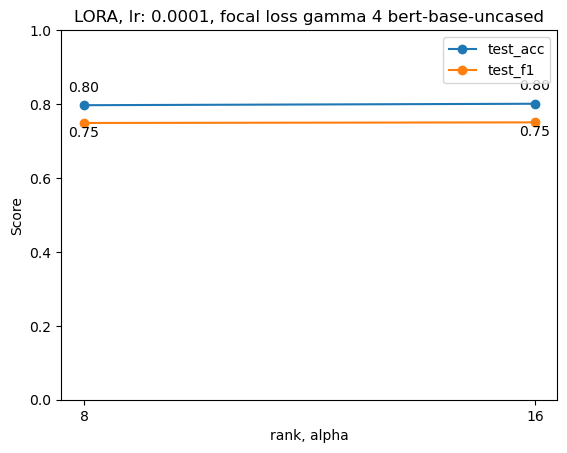

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f